In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TenArmedTestbed import Bandit
import seaborn as sns

%matplotlib inline
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

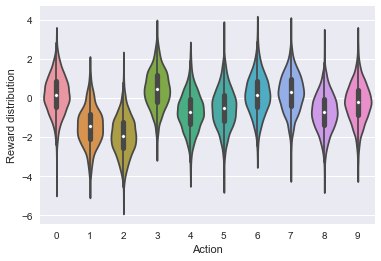

In [2]:
sns.violinplot(data=np.random.randn(2000,10)+ np.random.randn(10))
plt.xlabel("Action")
plt.ylabel("Reward distribution")

In [3]:
def banditSimulation(nBandits, time, bandits):
    bestActionCounts = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(0, len(bandits))]
    for banditInd, bandit in enumerate(bandits):
        for i in range(0, nBandits):
            for t in range(0, time):
                action = bandit[i].getAction()
                reward = bandit[i].takeAction(action)
                averageRewards[banditInd][t] += reward
                if action == bandit[i].bestAction:
                    bestActionCounts[banditInd][t] += 1
        bestActionCounts[banditInd] /= nBandits
        averageRewards[banditInd] /= nBandits
    return bestActionCounts, averageRewards

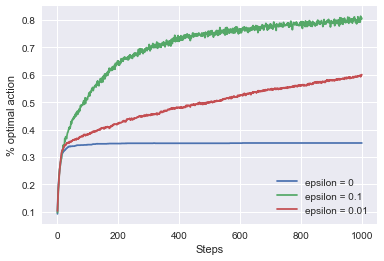

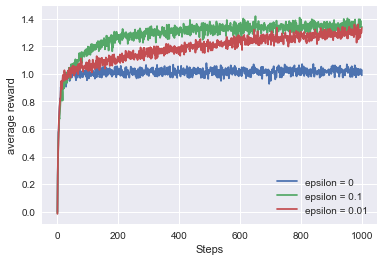

In [32]:
nBandits = 2000
time = 1000
epsilons = [0, 0.1, 0.01]
bandits = []
for epsInd, eps in enumerate(epsilons):
    bandits.append([Bandit(epsilon=eps, sampleAverages=True) for _ in range(0, nBandits)])
bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)

plt.figure(1)
#plt.subplot(111)
for eps, counts in zip(epsilons, bestActionCounts):
    plt.plot(counts, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

plt.figure(2)
#plt.subplot(111)
for eps, rewards in zip(epsilons, averageRewards):
    plt.plot(rewards, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('average reward')
plt.legend()

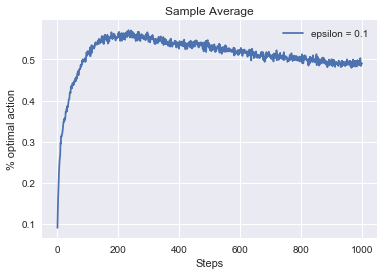

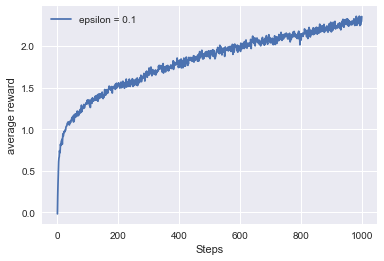

In [49]:
nBandits = 2000
time = 1000
epsilons=[0.1]
bandits=[]
for epsInd, eps in enumerate(epsilons):
    bandits.append([Bandit(epsilon=eps, sampleAverages=True, nonStationary=True, shift=0.1) for _ in range(0, nBandits)])
bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)

plt.title("Sample Average")
plt.figure(1)
for eps, counts in zip(epsilons, bestActionCounts):
    plt.plot(counts, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

plt.figure(2)
for eps, rewards in zip(epsilons, averageRewards):
    plt.plot(rewards, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('average reward')
plt.legend()

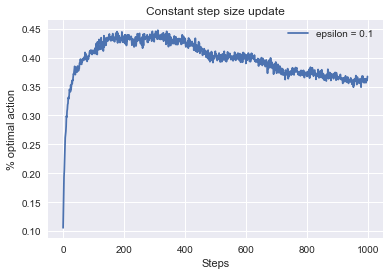

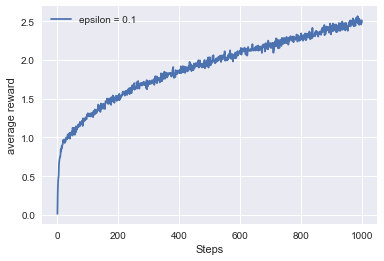

In [50]:
nBandits = 2000
time = 1000
epsilons=[0.1]
bandits=[]
for epsInd, eps in enumerate(epsilons):
    bandits.append([Bandit(epsilon=eps, stepSize=0.1, nonStationary=True, shift=0.1) for _ in range(0, nBandits)])
bestActionCounts, averageRewards = banditSimulation(nBandits, time, bandits)

plt.title("Constant step size update")
plt.figure(1)
for eps, counts in zip(epsilons, bestActionCounts):
    plt.plot(counts, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

plt.figure(2)
for eps, rewards in zip(epsilons, averageRewards):
    plt.plot(rewards, label='epsilon = '+str(eps))
plt.xlabel('Steps')
plt.ylabel('average reward')
plt.legend()

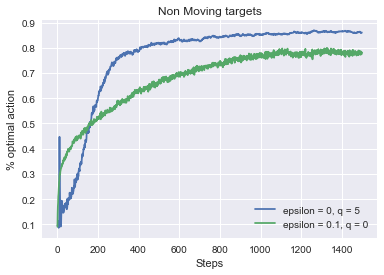

In [53]:
## for figure 2.3
nBandits = 2000
time = 1500
bandits = [[], []]
bandits[0] = [Bandit(epsilon=0, initial=5, stepSize=0.1) for _ in range(0, nBandits)]
bandits[1] = [Bandit(epsilon=0.1, initial=0, stepSize=0.1) for _ in range(0, nBandits)]
bestActionCounts, _ = banditSimulation(nBandits, time, bandits)
plt.title("Non Moving targets")
plt.plot(bestActionCounts[0], label='epsilon = 0, q = 5')
plt.plot(bestActionCounts[1], label='epsilon = 0.1, q = 0')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

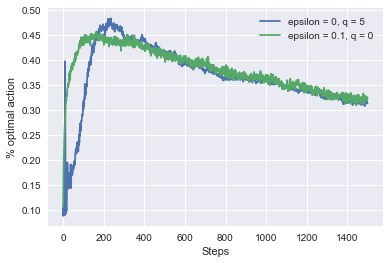

In [54]:
nBandits = 2000
time = 1500
bandits = [[], []]
bandits[0] = [Bandit(epsilon=0, initial=5, stepSize=0.1, nonStationary=True, shift=0.1) for _ in range(0, nBandits)]
bandits[1] = [Bandit(epsilon=0.1, initial=0, stepSize=0.1, nonStationary=True, shift=0.1) for _ in range(0, nBandits)]
bestActionCounts, _ = banditSimulation(nBandits, time, bandits)
plt.title("Moving target")
plt.plot(bestActionCounts[0], label='epsilon = 0, q = 5')
plt.plot(bestActionCounts[1], label='epsilon = 0.1, q = 0')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

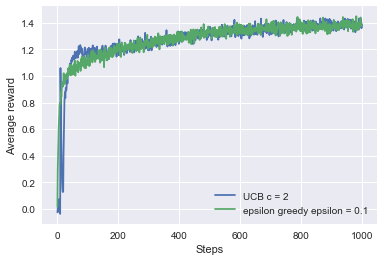

In [56]:
## for figure 2.4
nBandits = 2000
time = 1000
bandits = [[], []]
bandits[0] = [Bandit(epsilon=0, stepSize=0.1, UCBParam=2) for _ in range(0, nBandits)]
bandits[1] = [Bandit(epsilon=0.1, stepSize=0.1) for _ in range(0, nBandits)]
_, averageRewards = banditSimulation(nBandits, time, bandits)
plt.plot(averageRewards[0], label='UCB c = 2')
plt.plot(averageRewards[1], label='epsilon greedy epsilon = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

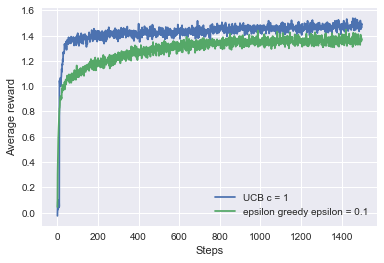

In [58]:
nBandits = 2000
time = 1500
bandits[0] = [Bandit(epsilon=0, stepSize=0.1, UCBParam=1) for _ in range(0, nBandits)]
bandits[1] = [Bandit(epsilon=0.1, stepSize=0.1) for _ in range(0, nBandits)]
_, averageRewards = banditSimulation(nBandits, time, bandits)
plt.plot(averageRewards[0], label='UCB c = 1')
plt.plot(averageRewards[1], label='epsilon greedy epsilon = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

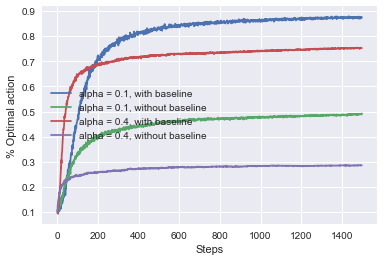

In [64]:
bandits =[[], [], [], []]
bandits[0] = [Bandit(gradient=True, stepSize=0.1, gradientBaseline=True, trueReward=4) for _ in range(0, nBandits)]
bandits[1] = [Bandit(gradient=True, stepSize=0.1, gradientBaseline=False, trueReward=4) for _ in range(0, nBandits)]
bandits[2] = [Bandit(gradient=True, stepSize=0.4, gradientBaseline=True, trueReward=4) for _ in range(0, nBandits)]
bandits[3] = [Bandit(gradient=True, stepSize=0.4, gradientBaseline=False, trueReward=4) for _ in range(0, nBandits)]
bestActionCounts, _ = banditSimulation(nBandits, time, bandits)
labels = ['alpha = 0.1, with baseline',
          'alpha = 0.1, without baseline',
          'alpha = 0.4, with baseline',
          'alpha = 0.4, without baseline']
for i in range(0, len(bandits)):
    plt.plot(bestActionCounts[i], label=labels[i])
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

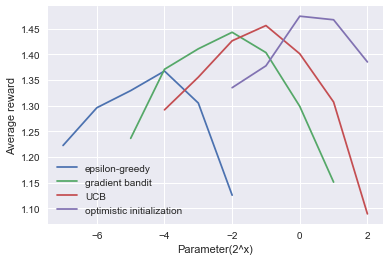

In [69]:
labels = ['epsilon-greedy', 'gradient bandit',
          'UCB', 'optimistic initialization']
generators = [lambda epsilon: Bandit(epsilon=epsilon, sampleAverages=True),
              lambda alpha: Bandit(gradient=True, stepSize=alpha, gradientBaseline=True),
              lambda coef: Bandit(epsilon=0, stepSize=0.1, UCBParam=coef),
              lambda initial: Bandit(epsilon=0, initial=initial, stepSize=0.1)]
parameters = [np.arange(-7, -1, dtype=np.float16),
              np.arange(-5, 2, dtype=np.float16),
              np.arange(-4, 3, dtype=np.float16),
              np.arange(-2, 3, dtype=np.float16)]
bandits = [[generator(pow(2, param)) for _ in range(0, nBandits)] for generator, parameter in zip(generators, parameters) for param in parameter]
_, averageRewards = banditSimulation(nBandits, time, bandits)
rewards = np.sum(averageRewards, axis=1)/time
i = 0
for label, parameter in zip(labels, parameters):
    l = len(parameter)
    plt.plot(parameter, rewards[i:i+l], label=label)
    i += l
plt.xlabel('Parameter(2^x)')
plt.ylabel('Average reward')
plt.legend()